# Preparation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [3]:
# Packages
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Data
df = pd.read_csv('Telco Customer Churn.csv',encoding ='latin')

# Initial EDA

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5155,8294-UIMBA,Female,0,No,No,30,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),94.40,2638.1,No
1169,1282-IHQAC,Male,1,No,No,70,No,No phone service,DSL,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),44.05,3011.65,No
2371,2712-SYWAY,Female,0,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.70,25.7,No
5541,6804-GDMOI,Female,0,No,No,61,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,106.60,6428.4,Yes
6494,4310-KEDTB,Female,0,No,Yes,26,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,29.80,786.5,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There are 7043 rows of data with 21 columns
- The target variable is `Churn` and possible dropped column is `customerID`
- Data has float, integer, and object values.
- Basically, there is no missing values/null in this data. But there is a blank values `...` on TotalCharges. Because of the blank values, the dtype of `['TotalCharges']` considered as an object. We need to change the blank value to get further analysis
- The value of the target `['Churn']` must be encoding in order to get an analysis correlation of the column with the others.

In [7]:
thereis_anomalies = df.sort_values(by=['TotalCharges'])
thereis_anomalies.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [8]:
# Getting unique values for each of the column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*10)

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender
['Female' 'Male']
Column: SeniorCitizen
[0 1]
Column: Partner
['Yes' 'No']
Column: Dependents
['No' 'Yes']
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService
['No' 'Yes']
Column: MultipleLines
['No phone service' 'No' 'Yes']
Column: InternetService
['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
Column: OnlineBackup
['Yes' 'No' 'No internet service']
Column: DeviceProtection
['No' 'Yes' 'No internet service']
Column: TechSupport
['No' 'Yes' 'No internet service']
Column: StreamingTV
['No' 'Yes' 'No internet service']
Column: StreamingMovies
['No' 'Yes' 'No internet service']
Column: Contract
['Month-to-month' 'One year' 'Two ye

In order to get full correlation between all columns, we need to encode all categorical with one-hot encode method. Or if the category had only two value, we could also use ordinal encoding. From the `.describe()` above we know that.

*   `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, and the target `Churn` is two category data columns.
*   `Tenure`, `MonthlyCharges`, and `TotalCharges` are continuous.
*   And the rest are three or more category data columns.
*   Unique value happen on `['Contract']` and `['PaymentMethod']` , while other three category just had `['Yes' 'No' 'No phone service']` value.







In [9]:
# Get rid of anomalies by replace it by 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:0 if x ==' ' else x)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
# Change two-category data with label encoding
df['Churn'] = df['Churn'].apply(lambda x:1 if x =='Yes' else 0)
df['Churn'] = df['Churn'].astype(int)

df['gender'] = df['gender'].apply(lambda x:1 if x =='Male' else 0)
df['gender'] = df['gender'].astype(int)

df['Partner'] = df['Partner'].apply(lambda x:1 if x =='Yes' else 0)
df['Partner'] = df['Partner'].astype(int)

df['Dependents'] = df['Dependents'].apply(lambda x:1 if x =='Yes' else 0)
df['Dependents'] = df['Dependents'].astype(int)

df['PhoneService'] = df['PhoneService'].apply(lambda x:1 if x =='Yes' else 0)
df['PhoneService'] = df['PhoneService'].astype(int)

df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x:1 if x =='Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].astype(int)

In [11]:
# Dropping unnecessary column
df.drop('customerID', axis=1, inplace=True)

In [12]:
# Create dummy variable encoding for three or more category data
encoded_df = pd.get_dummies(df, dtype=int)
encoded_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


For efficiency, we should make dummy encoding to full rank encoding by eliminated n-1. We could drop all '...No phone service' because we had `['PhoneService']` and '...Internet service' because we had `['Internet Service']`. Also we can drop '...Month to Month' and '...Mailed check' to make in n-1

In [13]:
encoded_df = encoded_df.drop(columns = [x for x in encoded_df.columns if 'No phone service' in x] + 
                             [x for x in encoded_df.columns if 'No internet service' in x] + 
                             ['PaymentMethod_Mailed check'] + ['Contract_Month-to-month'] + ['InternetService_No'])
encoded_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0


In [14]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [15]:
encoded_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,0.481329,0.421837,0.343746,0.439585,0.496663,0.286668,0.438450,0.344881,0.439443,0.343888,0.493114,0.290217,0.398978,0.384353,0.395428,0.387903,0.209144,0.240664,0.219225,0.216101,0.335794
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,0.499687,0.493888,0.474991,0.496372,0.500024,0.452237,0.496232,0.475363,0.496355,0.475038,0.499988,0.453895,0.489723,0.486477,0.488977,0.487307,0.406726,0.427517,0.413751,0.411613,0.472301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Around `27%` of the customer Churned.
- Customer gender are nearly balanced (`51`:`49`)
- Extreme values happen on `TotalCharges` column which can be seen from the mean value is greater than the median value & the maximum value is far greater than the 75% percentile value.

In [16]:
# After we sure that encoded_df are tidied up, we can make it as main df to easier the process.
df = encoded_df
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0


# Target Distribution

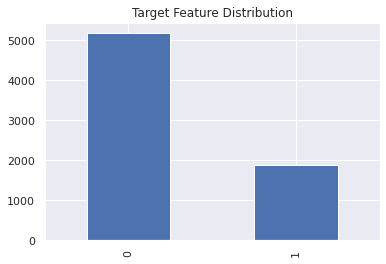

In [17]:
df['Churn'].value_counts().plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

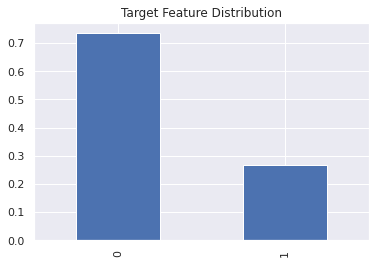

In [18]:
df['Churn'].value_counts(True).plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

73:27 distribution is still considered as balanced distribution

# Correlation Analysis

In [19]:
df_corr = df.corr()
df_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,-0.000080,-0.008612,0.004476,-0.008414,0.006568,-0.011286,0.010429,-0.017021,0.008191,-0.013773,-0.002988,-0.002105,0.003397,-0.009212,0.003267,-0.008393,0.005374,-0.010487,0.008026,-0.003695,-0.016024,0.001215,0.000752
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889,-0.136213,0.142948,-0.108322,0.255338,0.185532,-0.038653,0.087952,0.066572,0.094810,0.059428,0.205620,-0.060625,0.049062,0.105378,0.034210,0.120176,-0.046262,-0.117000,-0.016159,-0.024135,0.171718
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448,-0.129929,0.142057,-0.000851,0.000304,-0.129936,0.143106,-0.136058,0.141498,-0.147692,0.153786,-0.109443,0.119999,-0.124357,0.124666,-0.117529,0.117412,0.082783,0.248091,0.110706,0.082029,-0.083852
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221,0.023198,-0.024526,0.052010,-0.165818,-0.188434,0.080972,-0.138756,0.023671,-0.129415,0.013963,-0.172645,0.063268,-0.101176,-0.016558,-0.078198,-0.039741,0.068368,0.204613,0.052021,0.060267,-0.150642
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229,-0.323088,0.331941,0.013274,0.019720,-0.263746,0.327203,-0.312694,0.360277,-0.312740,0.360653,-0.262143,0.324221,-0.245039,0.279756,-0.252220,0.286111,0.202570,0.558533,0.243510,0.233006,-0.208363
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942,0.315431,0.279690,-0.452425,0.289999,-0.057880,-0.092893,-0.092867,-0.052312,-0.074776,-0.071227,-0.054447,-0.096340,-0.122455,-0.022574,-0.112254,-0.032959,-0.002791,0.003519,0.007556,-0.007721,0.003062
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825,-0.151864,0.163530,-0.063121,0.326853,0.267793,-0.003636,0.145120,0.126735,0.167121,0.103797,0.230136,0.037880,0.047712,0.223841,0.059488,0.211716,-0.051391,-0.147889,-0.016332,-0.013589,0.208865
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356,-0.338314,0.490434,-0.160189,0.787066,0.360898,0.296594,0.210753,0.441780,0.171836,0.482692,0.322076,0.338304,0.016951,0.629603,0.018075,0.627429,0.004904,-0.074681,0.042812,0.030550,0.271625
TotalCharges,-0.000080,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324,-0.396059,0.468504,-0.052469,0.361655,-0.063137,0.411651,-0.176276,0.509226,-0.188108,0.521983,-0.082874,0.431883,-0.195884,0.514973,-0.202188,0.520122,0.170814,0.354481,0.185987,0.182915,-0.059246
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000,-0.032569,0.040102,-0.124214,0.308020,0.342637,-0.171226,0.268005,-0.082255,0.252481,-0.066160,0.337281,-0.164674,0.128916,0.063228,0.130845,0.061382,-0.177820,-0.302253,-0.117937,-0.134302,0.301919


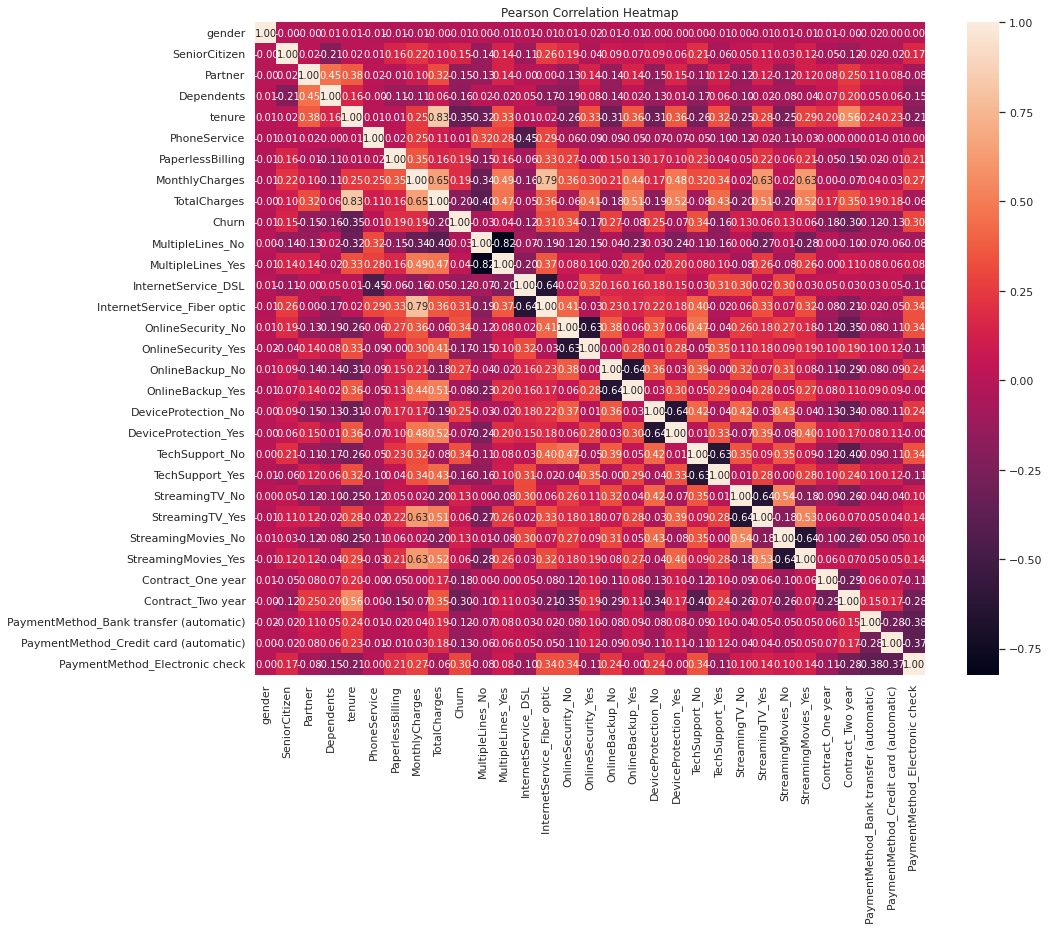

In [20]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

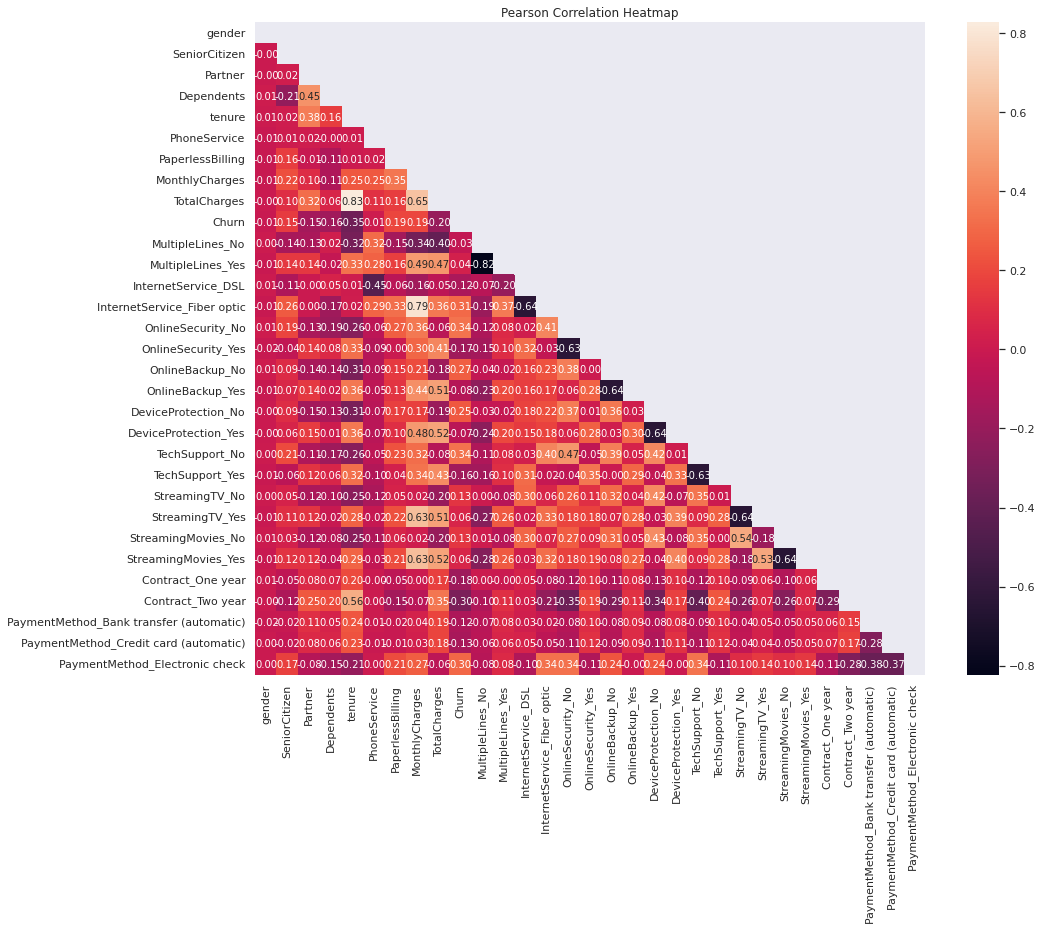

In [21]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

- `TotalCharges` and `tenure`, also `InternetService_Fiber Optic` and `MonthlyCharges` are good candidates of predictors
- However, they have a very high correlation (0.83 and 0.79) which means we have to choose which one of them will be used as predictor

# Total Charges Analysis

If we take a look back for a while, we must remember that `we replace few rows blank TotalCharge value with 0` . Now let's take a look into original data numerical feature.

In [22]:
dfori = pd.read_csv('Telco Customer Churn.csv',encoding ='latin')

In [23]:
dfnum = dfori[['tenure', 'MonthlyCharges', 'TotalCharges']]
dfnum.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


We could see a red line here, that `the TotalCharges value really close to value tenure * MonthlyCharges`. So, how about we take a look into specific data that had blank TotalCharges value.

In [24]:
display(dfnum.iloc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]])

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,
753,0,20.25,
936,0,80.85,
1082,0,25.75,
1340,0,56.05,
3331,0,19.85,
3826,0,25.35,
4380,0,20.00,
5218,0,19.70,
6670,0,73.35,


Interesting! So the customer with blank TotalCharges have the tenure value 0. It means the customer with blank TotalCharges most likely `cancel their subscription to the company before their contract periods end`. It result their TotalCharges are undefined.

# Family Analysis

In [25]:
dfori = pd.read_csv('Telco Customer Churn.csv',encoding ='latin')

In [26]:
dfpartner = df.groupby(['Partner'])[['Churn']].agg({'count','mean'})
dfdep = df.groupby(['Dependents'])[['Churn']].agg({'count','mean'})

In [27]:
dfpartner

Churn      
             mean count
Partner                
0        0.329580  3641
1        0.196649  3402

In [28]:
dfdep

Churn      
                mean count
Dependents                
0           0.312791  4933
1           0.154502  2110

Take a look of data above. As we can see `Partner` and `Dependents` had similiarly distribution characteristic : `if customer had partner or dependents they had lower chance of churn`. Also, if we take a look at the columns description on kaggle, we know that :

*   Partner = the customer that had partners, something like couple or married
*   Dependents = the customer that had dependents

Now, how about we just merge this into one columns as Family columns?

In [29]:
list_family = []
for rows in range(len(dfori['Partner'])):
  if ((dfori['Partner'][rows] == 'No') and (dfori['Dependents'][rows] == 'No')):
    list_family.append('No')
  else :
    list_family.append('Yes')

Now, let's grouped it again and see how the distribution between Churn and Family columns. But before that, we must append the column to main df and encoding it with label encoding.

In [30]:
df['Family'] = list_family
df['Family'] = df['Family'].apply(lambda x:1 if x =='Yes' else 0)
df['Family'] = df['Family'].astype(int)

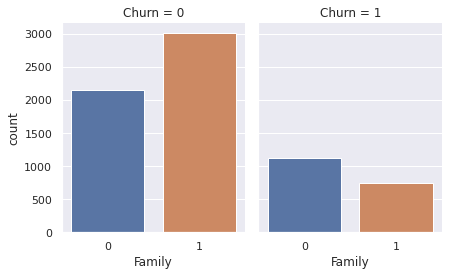

In [31]:
plot_fam = sns.catplot(x='Family', col='Churn', data = df, kind='count', height=4, aspect=0.8)

From the data above, we know that customer with family `less likely to Churn`

# Online Service Analysis

With the same method, how about we analyze Online Security and Online Backup columns?

In [32]:
list_onserv = []
for rows in range(len(dfori['OnlineSecurity'])):
  if ((dfori['OnlineSecurity'][rows] == 'No') and (dfori['OnlineBackup'][rows] == 'No')):
    list_onserv.append('No')
  else :
    list_onserv.append('Yes')

df['OnlineServices'] = list_onserv
df['OnlineServices'] = df['OnlineServices'].apply(lambda x:1 if x =='Yes' else 0)
df['OnlineServices'] = df['OnlineServices'].astype(int)

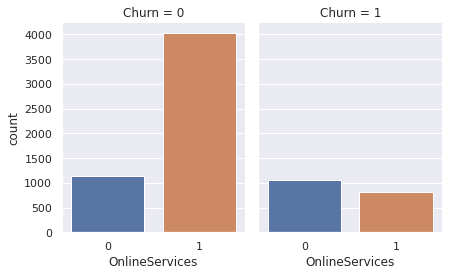

In [33]:
plot_onserv = sns.catplot(x='OnlineServices', col='Churn', data = df, kind='count', height=4, aspect=0.8)

From the data above, we know that customer with no online services (either Security or Backup) had `little higher chance to Churn`

# Streaming Service Analysis

One more column to merge & analyze. Streaming Service will consist of StreamingTV and StreamingMovies

In [34]:
list_stream = []
for rows in range(len(dfori['StreamingTV'])):
  if ((dfori['StreamingTV'][rows] == 'No') and (dfori['StreamingMovies'][rows] == 'No')):
    list_stream.append('No')
  else :
    list_stream.append('Yes')

df['StreamingServices'] = list_stream
df['StreamingServices'] = df['StreamingServices'].apply(lambda x:1 if x =='Yes' else 0)
df['StreamingServices'] = df['StreamingServices'].astype(int)

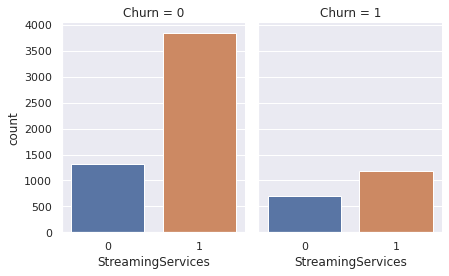

In [35]:
plot_stream = sns.catplot(x='StreamingServices', col='Churn', data = df, kind='count', height=4, aspect=0.8)

From the data above, we know that customer opted for StreamingServices (StreamingTV or StreamingMovies) had `higher chance to Churn`

# Conclusion

From the analysis, i had two theories and recommendations :

*   The Telco company had good family contents because the family customers are slightly loyal to the company. But they need to engage the single customers, maybe company can give one-day vacation for loyal customer so they could enjoy quality time for theirself.
*   The Telco company not yet seems securable, it cause the people didn't opted for OnlineService and more likely to Churn. The Telco company must added new feature to their OnlineService like online backup storage with encrypted message maybe help engage customer and decrese Churn rate.
*   Lastly, the Telco company has little poor of streaming service. So the people with StreamingService more higher chance to Churn. To prevent that, the Telco company must improve their streaming service. How about premium movies for loyal customer with earlier release date than other company?

# EDA Packages

There are some packages that could boost the EDA :

*   Pandas Profiling
*   Sweetviz
*   Data Explorer



In [37]:
# Install Packages
!pip install -U pandas-profiling
!pip install sweetviz

     |████████████████████████████████| 261 kB 8.3 MB/s 
     |████████████████████████████████| 10.1 MB 52.2 MB/s 
     |████████████████████████████████| 675 kB 45.1 MB/s 
     |████████████████████████████████| 3.1 MB 20.3 MB/s 
     |████████████████████████████████| 303 kB 50.5 MB/s 
     |████████████████████████████████| 102 kB 11.7 MB/s 
     |████████████████████████████████| 62 kB 600 kB/s 
     |████████████████████████████████| 596 kB 56.7 MB/s 
     |████████████████████████████████| 812 kB 75.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=c390d1f4a5769208b42827ea4d7ff3a6a9d3f5fb33833cd969f7f4b1dd548ab1
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=67927e9b91d9db7c67265ef59f47129f1a896595d9facfcb0b284a641105a246
 

     |████████████████████████████████| 15.1 MB 5.6 MB/s 


In [38]:
# Import Packages

import pandas as pd
from ipywidgets import widgets
import numpy as np

#Import pandas_profiling
from pandas_profiling import ProfileReport

#Import Sweetviz
import sweetviz as sv

#Import RPy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import rpy2.robjects.packages as rpackages
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
#Input the desired R packages
R_packages=['DataExplorer']
#Install the desired R packages
utils=rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
for package in R_packages:
    if not(rpackages.isinstalled(package)):
        utils.install_packages(package)
#As a 'bridge' between python and R environment
r=robjects.r

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [36]:
# Splitting Data
train_perc = 0.8

#This splitting methodology is not a best practice when we want to train a prediction model.
#However, in this case it is okay to use this methodology since we only want to compare the features
#of several data exploration package
df_train = df.loc[:round(train_perc*len(df)),:]
df_test = df.loc[1+round(train_perc*len(df)):,:]

In [39]:
# Pandas Profiling

pandas_profiling_report = df_train.profile_report(
    title="Pandas Profiling Report", 
    explorative=True,  #More analysis (Unicode)
    html={'style': 
          {'full_width': True,
           'theme':'flatly'} #available theme options: ‘bootswatch’ ,'flatly','united'
        }, 
    interactions = {'targets' : ['Churn']} , #When a list of variable names is given, only interactions between these and all other variables are given.
    progress_bar=True)
pandas_profiling_report.to_file("telco_pandas_profiling_report.html")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
# Sweetviz

sweetviz_report = sv.compare([df_train, "Training Data"], [df_test, "Test Data"],   "Churn")
sweetviz_report.show_html("telco_sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report telco_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [42]:
# Data Explorer

#Import DataExplorer R Package
DataExplorer=rpackages.importr('DataExplorer')

#Convert Python object to R object
with localconverter(ro.default_converter + pandas2ri.converter):
  robjects.globalenv['df_train'] = ro.conversion.py2rpy(df_train)

#Generate DataExplorer Report
r('create_report(df_train, report_title = "Telco DataExplorer Report", output_file = "telco_DataExplorer_report.html")')

R[write to console]: 

processing file: report.rmd



  |..                                                                    |   2%
   inline R code fragments

  |...                                                                   |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                                 |   7%
  ordinary text without R code

  |.......                                                               |  10%
label: introduce
  |........                                                              |  12%
  ordinary text without R code

  |..........                                                            |  14%
label: plot_intro
  |............                                                          |  17%
  ordinary text without R code

  |.............                                                         |  19%
label: data_structure
  |...............                                                       |  21%
  ordinary text without R c

R[write to console]: output file: /content/gdrive/MyDrive/report.knit.md




/usr/bin/pandoc +RTS -K512m -RTS /content/gdrive/MyDrive/report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /content/gdrive/MyDrive/telco_DataExplorer_report.html --self-contained --variable bs3=TRUE --standalone --section-divs --table-of-contents --toc-depth 6 --template /usr/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=yeti --include-in-header /tmp/Rtmp0lT5xS/rmarkdown-str68407e6598.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 


R[write to console]: 
Output created: telco_DataExplorer_report.html



0
